# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 0383 Емельянов Дмитрий и Черепанов Роман. Вариант №16.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Пусть $s$ — дискретный сигнал, для которого заданы $k$ отсчетов на отрезке $[0, k-1]$, равный 0 в остальных точках.

Тогда для сигнала $s$ определены следующие характеристики:

**Среднее значение сигнала** $\bar s = \sum_{i=0}^{k-1}\frac{s(i)}{k}$;

**Энергия сигнала** $E = \sum_{i=0}^{k-1}s^2(i)$;

**Средняя мощность сигнала** $P = \sum_{i=0}^{k-1}\frac{s^2(i)}{k} = \frac{E}{k}$.

Дискретный единичный скачок, задержанный на $m$ отсчетов:
$$
\sigma_d(k, m)=\sigma_d(k-m)=
\begin{cases}
1, & k-m\geq0,\\
0, & k-m<0.
\end{cases}
$$


## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы


In [98]:
import numpy as np
import matplotlib.pyplot as plt

# условия варианта
Nb = 16
N = 30 + Nb % 5
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
U = Nb
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

## 1) Дискретный прямоугольный импульс

---

Смоделировать дискретный прямоугольный импульс:

$$s_1(k)= \begin{cases}U, & n_0 \le k \le n_0+n_{imp}-1\\0, & иначе\end{cases}$$

на основе дискретного единичного скачка $σ_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, N-1]$. Пояснить как выполняется моделирование импульса.

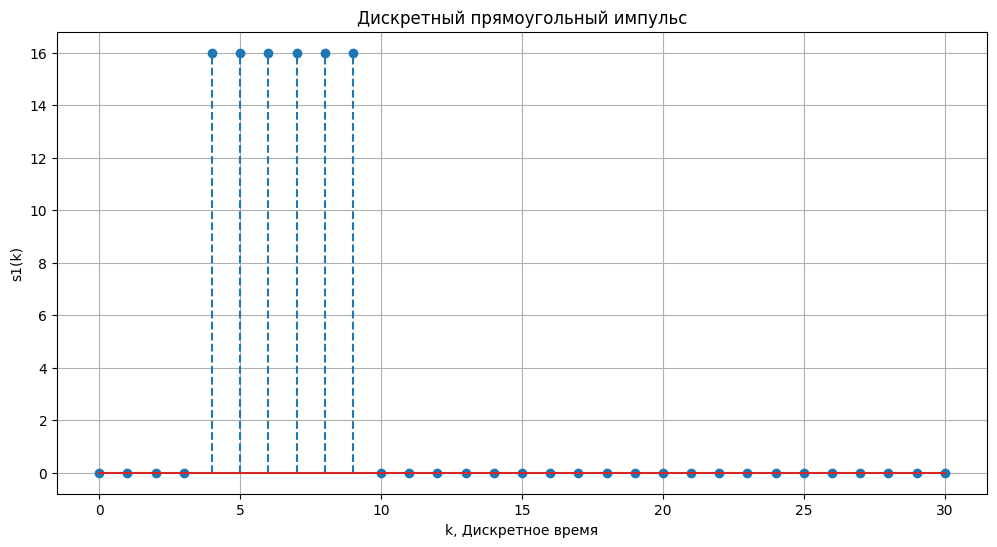

In [99]:
def s1(k):
  """Дискретный прямоугольный импульс"""
  return U if n0 <= k <= (n0 + n_imp - 1) else 0

samples = list(range(0, N))
plt.figure(figsize=(12,6))
plt.title("Дискретный прямоугольный импульс")
plt.xlabel("k, Дискретное время")
plt.ylabel("s1(k)")
plt.stem(samples, [s1(sample) for sample in samples], linefmt='--')
plt.grid()

В предложенном варианте импульс моделируется по определению.

Но данный импульс также можно представить как линейную комбинацию двух задержанных дискретных единичных скачков $\sigma_d(k, n_0)$ и $\sigma_d(k, n_0+n_{imp})$:

$$s_1(k)= U(\sigma_d(k-n_0)-\sigma_d(k-n_0-n_{imp}))$$

Так, $\sigma_d(k-n_0)$ имеет значение 1 на $[n_0, \infty)=[4, \infty)$, а $\sigma_d(k-n_0-n_{imp})$ — на $[n_0 + n_{imp}, \infty)=[9,\infty)$. Таким образом, при вычитании второго из первого, полученный импульс будет иметь значение 1 на отрезке $[4, 9]$ и 0 в ином случае.

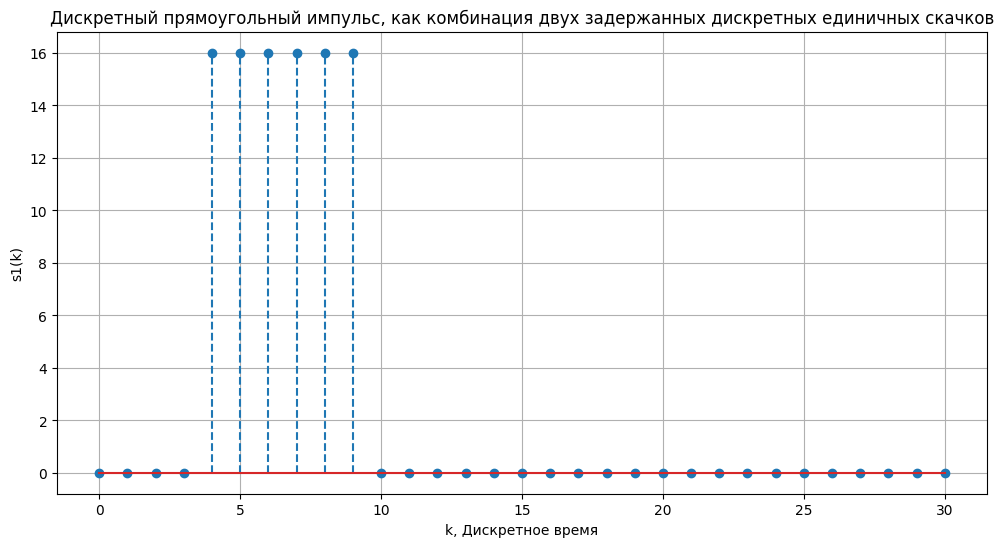

In [100]:
def sigma(k):
  """Дискретный единичный скачок"""
  return 1 if k >= 0 else 0

# Получаем линейную комбинацию импульсов
first_part = [sigma(k - n0) for k in samples]
second_part = [sigma(k - n0 - n_imp) for k in samples]
imp_values = [U * (y1 - y2) for y1, y2 in zip(first_part, second_part)]

plt.figure(figsize=(12,6))
plt.title("Дискретный прямоугольный импульс, как комбинация двух задержанных дискретных единичных скачков")
plt.xlabel("k, Дискретное время")
plt.ylabel("s1(k)")
plt.stem(samples, imp_values, linefmt='--')
plt.grid()

Как можно заметить, дискретный прямоугольный импульс и импульс, полученный линейной комбинацией двух задержанных дискретных единичных скачков, совпали.

## 2) Линейная комбинация дискретных гармонических сигналов $s_2(k)$


---


Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$$
где
$$x_i(k) = B_isin(\widehat{\omega}_i k), \quad i = 1,2,3,$$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N-1]$. Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности $s_2(k)$ (идентификатор P). Пояснить:  
a. операции при моделировании линейной комбинации сигналов $s_2(k)$;  
b. как определяют указанные характеристики.


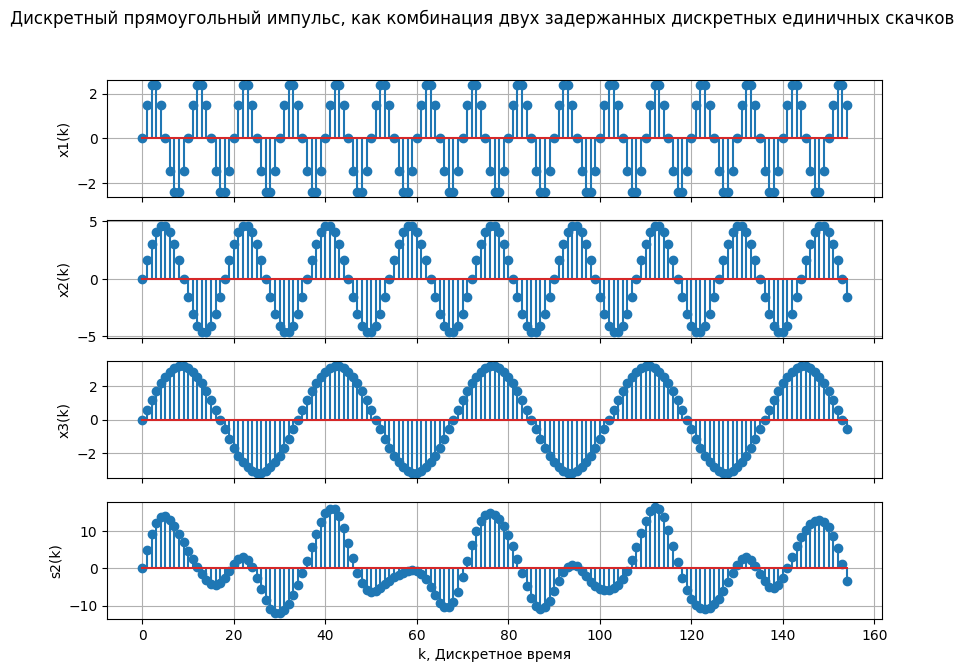

In [101]:
# дискретные гармонические сигналы
def x1(k):
  return B1 * np.sin(w1 * k)

def x2(k):
  return B2 * np.sin(w2 * k)

def x3(k):
  return B3 * np.sin(w3 * k)

# линейная комбинация
def s2(k):
  """линейная комбинация дискретных гармонических сигналов"""
  return a1 * x1(k) + a2 * x2(k) + a3 * x3(k)

# отрисовка графиков
samples = list(range(0, 5*N))

f, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 7))
f.suptitle("Дискретный прямоугольный импульс, как комбинация двух задержанных дискретных единичных скачков")
axs[3].set_xlabel("k, Дискретное время")
axs[0].stem(samples, [x1(k) for k in samples])
axs[1].stem(samples, [x2(k) for k in samples])
axs[2].stem(samples, [x3(k) for k in samples])
axs[3].stem(samples, [s2(k) for k in samples])

for axs_i, y_label_i in zip(axs, ["x1", "x2", "x3", "s2"]):
  axs_i.grid()
  axs_i.set_ylabel(f"{y_label_i}(k)")

In [102]:
mean_s2 = np.sum([s2(k) for k in range(0, 5*N)])/(5*N)
E = np.sum([s2(k) ** 2 for k in range(0, 5*N)])
P = E / (5*N)
print(f"mean_s2: {mean_s2}")
print(f"E: {E}")
print(f"P: {P}")

mean_s2: 0.8251426335869714
E: 9493.592607246534
P: 61.248984562880864


Для моделирования линейной комбинации сигналов каждый сигнал был моделирован по отдельности, а затем найдена их сумма.

Характеристики комбинации сигналов были найдены в соответствии с формулами, указанными в теоретических положениях.

Среднее значение сигнала достаточно близко к 0, а средняя мощность значительно превышает это значение. Это объясняется периодической сменой знака сигнала: положительные и отрицательные значения компенсируют друг друга, поэтому среднее значение близко к 0.

## 3) Дискретный сигнал с экспоненциальной огибающей

---

Вывести график дискретного сигнала $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$
$$s(k)=C\cos(\hat{w}_0k)$$
с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N-1]$. Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

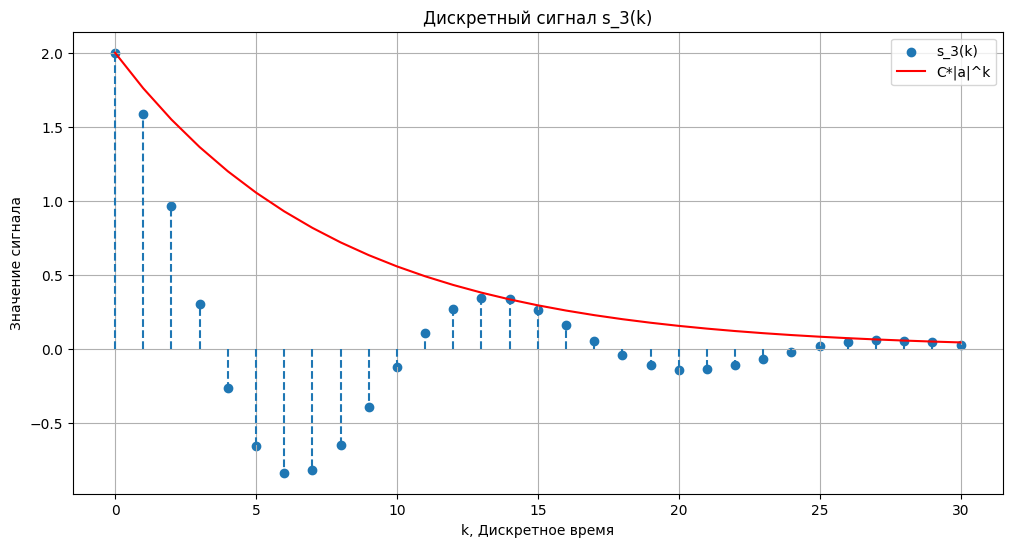

In [103]:
def s(k):
  """Дискретный гармонический сигнал"""
  return C * np.cos(w0 * k)

def s3(k):
  return abs(a)**k * s(k)

samples = list(range(0, N))
plt.figure(figsize=(12,6))
plt.title("Дискретный сигнал s_3(k)")
plt.xlabel("k, Дискретное время")
plt.ylabel("Значение сигнала")
plt.scatter(samples, [s3(k) for k in samples], label='s_3(k)')
plt.vlines(samples, 0, [s3(k) for k in samples], linestyles="dashed")
plt.plot(samples, [abs(a)**k * C for k in samples], label='C*|a|^k', c='red')
plt.legend()
plt.grid()

Для моделирования сигнала с экспоненциальной огибающей $|a|^k$ значения гармонического сигнала $s(k)$, принадлежащие отрезку $[-C, C]$, были умножены на соответствующие значения экспоненты. Таким образом сигнал по модулю не превышает $C|a|^k$, а в точках, в которых $\cos(\hat{w}_0k)$ близко к 1, сигнал почти совпадает с огибающей экспонентой.


## 4) Периодическая последовательность дискретных прямоугольных импульсов

---

Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.



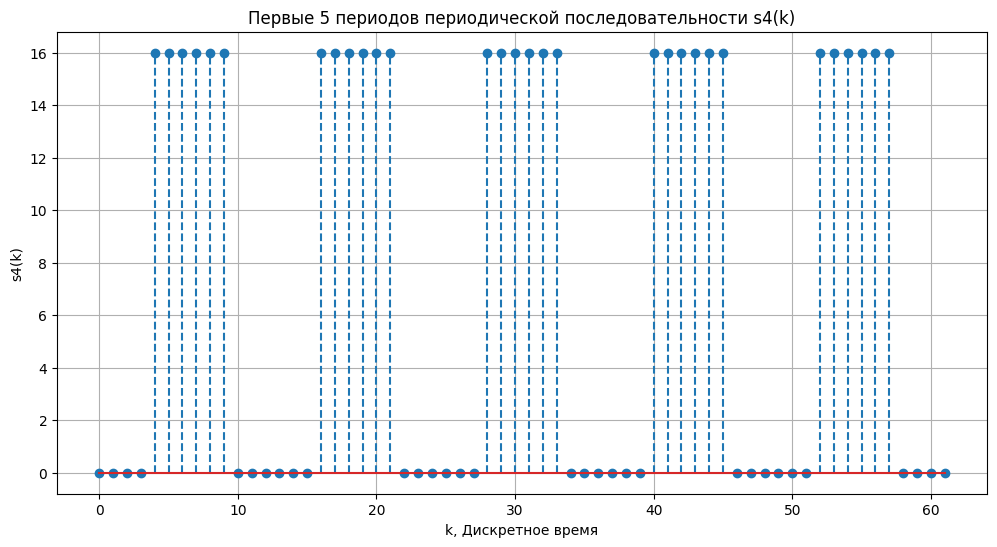

In [104]:
def s4(k):
  """Периодическая последовательность дискретных прямоугольных импульсов"""
  return np.sum([s1(k-i*T) for i in range(5)])

T = 2*n_imp
samples = list(range(2*N))
plt.figure(figsize=(12,6))
plt.title("Первые 5 периодов периодической последовательности s4(k)")
plt.xlabel("k, Дискретное время")
plt.ylabel("s4(k)")
plt.stem(samples, [s4(k) for k in samples], linefmt='--')
plt.grid()

Для моделирования нескольких периодов прямоугольного импульса используется формула, описанная в пункте 1 данной работы, с некоторыми изменениями.

Второй период прямоугольного импульса представляет собой тот же прямоугольный импульс, задержанный на $T = 2 \cdot n_{imp}$. Поэтому можно для моделирования 5 периодов использовать сигнал $s_1$, задержанный на $T, 2T, 3T$ и $4T$. Для задержки сигнала используется метод, описанный в практической работе №1: для задержки сигнала на $m$ отсчетов требуется посчитать значение сигнала с аргументом, уменьшенным на $m$.

Итоговый сигнал представляет собой сумму 5 сигналов с разной задержкой.

## Выводы
В ходе выполнения практической работы было рассмотрено математическое описание линейных комбинаций дискретных сигналов и выполнено моделирование данных сигналов при помощи языка Python.

Были рассмотрены способы моделирования дискретных сигналов: дискретного прямоугольного импульса, дискретных гармонических сигналов и их линейных комбинаций — и вычисление численных характеристик сигналов: энергии, среднего значения и средней мощности. Для смоделированных сигналов были построены графики на интервалах дискретного времени.

В работе применялись комбинации нескольких дискретных сигналов для моделирования более сложных сигналов. Так, периодический прямоугольный импульс представлен в виде суммы прямоугольных импульсов с различной задержкой.